In [135]:
import os
import pandas as pd
import numpy as np
import talib

In [136]:
df = pd.read_csv('xrp15.csv')
df.head()

,date,open,high,low,final,vol
0,2020-04-21T10:45:00,226,227,225,225,616718
1,2020-04-21T10:30:00,226,227,226,226,377058
2,2020-04-21T10:15:00,225,227,225,227,398739
3,2020-04-21T10:00:00,226,227,225,225,714628
4,2020-04-21T09:45:00,227,228,225,225,2069419


In [137]:
df=df[::-1] #시간을 역순으로 만들어줌
df.head()

,date,open,high,low,final,vol
89211,2017-09-26T17:45:00,205,207,205,207,0
89210,2017-09-26T18:00:00,206,207,206,206,0
89209,2017-09-26T18:15:00,206,207,206,206,0
89208,2017-09-26T18:30:00,206,206,205,206,0
89207,2017-09-26T18:45:00,206,206,205,206,0


In [138]:
df=df.reset_index(drop=True)
df.rename(columns={"final":"close","vol":"volume"}, inplace = True)
df

,date,open,high,low,close,volume
0,2017-09-26T17:45:00,205,207,205,207,0
1,2017-09-26T18:00:00,206,207,206,206,0
2,2017-09-26T18:15:00,206,207,206,206,0
3,2017-09-26T18:30:00,206,206,205,206,0
4,2017-09-26T18:45:00,206,206,205,206,0
...,...,...,...,...,...,...
89207,2020-04-21T09:45:00,227,228,225,225,2069419
89208,2020-04-21T10:00:00,226,227,225,225,714628
89209,2020-04-21T10:15:00,225,227,225,227,398739
89210,2020-04-21T10:30:00,226,227,226,226,377058


In [139]:
def Indicators(df): # date close open high low volume 컬럼순 
                    # 결측치 33줄 생김 0~32 까지
    df['sma5'] = talib.SMA(np.asarray(df['close']), 5)
    df['sma20'] = talib.SMA(np.asarray(df['close']), 20)
    #df['sma120'] = talib.SMA(np.asarray(df['close']), 120)
    df['ema12'] = talib.SMA(np.asarray(df['close']), 12)
    df['ema26'] = talib.SMA(np.asarray(df['close']), 26)
    upper, middle, lower = talib.BBANDS(np.asarray(df['close']), timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
    df['dn'] = lower
    df['mavg'] = middle
    df['up'] = upper
    df['pctB'] = (df.close - df.dn)/(df.up - df.dn)
    rsi14 = talib.RSI(np.asarray(df['close']), 14)
    df['rsi14'] = rsi14
    macd, macdsignal, macdhist = talib.MACD(np.asarray(df['close']), 12, 26, 9)  
    df['macd'] = macd
    df['macdsignal'] = macdsignal
    df['obv']=talib.OBV(df['close'], df['volume'])
    df['ad'] = talib.AD(df['high'], df['low'], df['close'], df['volume'])
    df['ADOSC'] = talib.ADOSC(df['high'], df['low'], df['close'], df['volume'], fastperiod=3, slowperiod=10)
    return df

In [140]:
df[['close','open','high','low','volume']]=df[['close','open','high','low','volume']].astype(float)
df=Indicators(df)

In [141]:
df = df[df.volume != 0] # 거래정지 제거 
df.tail()

,date,open,high,low,close,volume,sma5,sma20,ema12,ema26,dn,mavg,up,pctB,rsi14,macd,macdsignal,obv,ad,ADOSC
89207,2020-04-21T09:45:00,227.0,228.0,225.0,225.0,2069419.0,225.2,224.30,224.583333,224.307692,222.290025,224.30,226.309975,0.674132,49.344275,-0.325504,-0.735724,1.746395e+09,-7.192752e+08,-5.530250e+05
89208,2020-04-21T10:00:00,226.0,227.0,225.0,225.0,714628.0,225.4,224.35,224.666667,224.269231,222.322687,224.35,226.377313,0.660311,49.344275,-0.284068,-0.645393,1.746395e+09,-7.199898e+08,-9.862955e+05
89209,2020-04-21T10:15:00,225.0,227.0,225.0,227.0,398739.0,225.8,224.55,224.833333,224.269231,222.316169,224.55,226.783831,1.048385,57.002855,-0.088822,-0.534078,1.746794e+09,-7.195911e+08,-9.470078e+05
89210,2020-04-21T10:30:00,226.0,227.0,226.0,226.0,377058.0,226.0,224.65,224.916667,224.269231,222.345656,224.65,226.954344,0.792925,52.711634,-0.014611,-0.430185,1.746417e+09,-7.199681e+08,-9.648170e+05
89211,2020-04-21T10:45:00,226.0,227.0,225.0,225.0,616718.0,225.6,224.70,225.000000,224.307692,222.410895,224.70,226.989105,0.565528,48.758688,-0.036074,-0.351363,1.745800e+09,-7.205848e+08,-1.080620e+06


In [142]:
import os
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout, LSTM, CuDNNLSTM, BatchNormalization
from sklearn.preprocessing import MinMaxScaler,RobustScaler
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error

look_back = 50
def create_dataset(dataset, look_back=50):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i + look_back)].values.tolist()
        dataX.append(a)
        dataY.append(dataset.iloc[i + look_back]['close'])
    return np.array(dataX), np.array(dataY)

df=df.iloc[33:]
df=df.fillna(0)
df=df.drop(columns=['date'])
nptf=np.array(df)

In [143]:

# normalization
Xscaler = RobustScaler()
Yscaler = RobustScaler()
Xscaler.fit(nptf)
Yscaler.fit(nptf[:,3].reshape(-1,1))

nptf = pd.DataFrame(Xscaler.transform(nptf),columns=df.columns)


In [144]:

# split train, test
train_size = int(len(nptf) * 0.95)
test_size = len(nptf) - train_size
train, test = nptf[0:train_size], nptf[train_size:len(nptf)]
print(len(train), len(test))
 
# create dataset for learning
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
 
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0],  trainX.shape[1],19))
testX = np.reshape(testX, (testX.shape[0],  testX.shape[1],19))
 
trainX.shape
 

81012 4264


(80961, 50, 19)

In [145]:
# simple lstm network learning
model = Sequential()
model.add(CuDNNLSTM(128, input_shape=(look_back, 19)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=40, batch_size=512,verbose=1)

Epoch 1/40
80961/80961 [==============================] - 12s 153us/step - loss: 0.4829
Epoch 2/40
80961/80961 [==============================] - 12s 143us/step - loss: 0.0104
Epoch 3/40
80961/80961 [==============================] - 11s 142us/step - loss: 0.0070
Epoch 4/40
80961/80961 [==============================] - 11s 139us/step - loss: 0.0062
Epoch 5/40
80961/80961 [==============================] - 12s 144us/step - loss: 0.0051
Epoch 6/40
80961/80961 [==============================] - 12s 142us/step - loss: 0.0042
Epoch 7/40
80961/80961 [==============================] - 12s 143us/step - loss: 0.0044
Epoch 8/40
80961/80961 [==============================] - 12s 143us/step - loss: 0.0037
Epoch 9/40
80961/80961 [==============================] - 11s 139us/step - loss: 0.0036
Epoch 10/40
80961/80961 [==============================] - 11s 139us/step - loss: 0.0037
Epoch 11/40
80961/80961 [==============================] - 11s 139us/step - loss: 0.0034
Epoch 12/40
80961/80961 [=====

In [171]:

# make prediction
testPredict = model.predict(testX)
testPredict = Yscaler.inverse_transform(testPredict)
testY = Yscaler.inverse_transform(testY.reshape(-1,1))
testScore = math.sqrt(mean_squared_error(testY, testPredict)) # RMSE 값이 바뀐다
print('Train Score: %.2f RMSE' % testScore) 


ValueError: Expected 2D array, got 1D array instead:
array=[-0.38107246 -0.38107246 -0.38107246 ... -0.6700934  -0.6700934
 -0.66653514].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

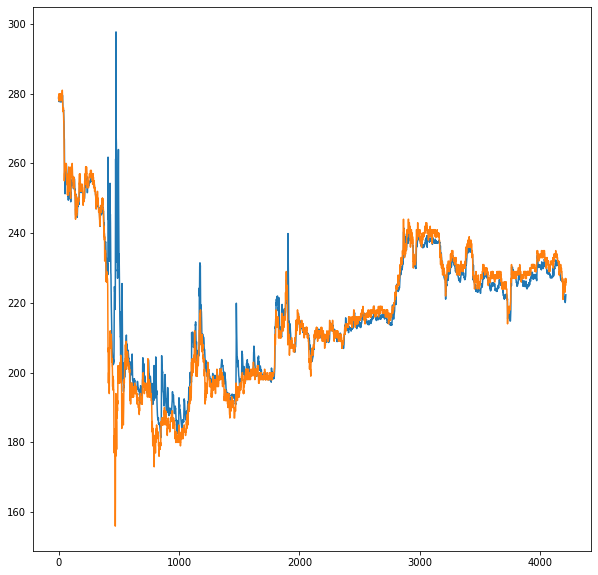

In [147]:

# plot
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(testPredict)
plt.plot(testY)
plt.show()

In [148]:
from sklearn.externals import joblib 
# 객체를 pickled binary file 형태로 저장한다 
file_name = 'Xscale.pkl' 
joblib.dump(Xscaler, file_name) 
file_name = 'Yscale.pkl' 
joblib.dump(Yscaler, file_name)

['Yscale.pkl']

In [149]:
from keras.models import load_model
model.save('LSTM.h5')

In [150]:
xs=joblib.load('Xscale.pkl')
ys=joblib.load('Yscale.pkl')
LSTM = load_model('LSTM.h5')

In [151]:
# make prediction
tp = LSTM.predict(testX)
tp = ys.inverse_transform(tp)

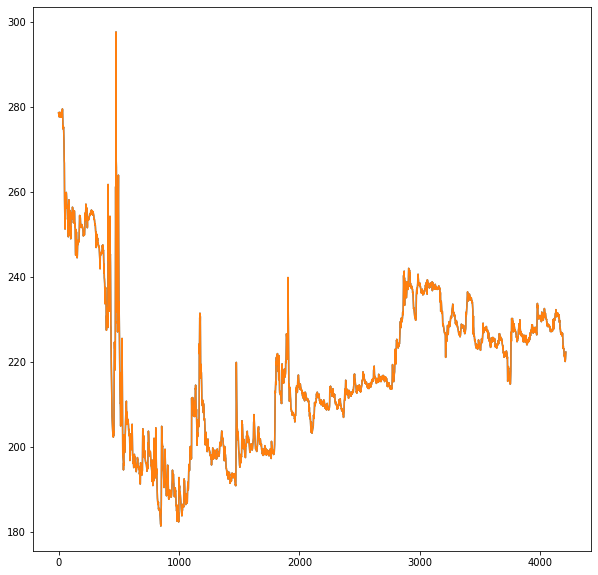

In [152]:

# plot
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(testPredict)
#plt.plot(testY)
plt.plot(tp)
plt.show()

In [153]:
def create_dataset(dataset):
    dataX, dataY = [], []
    for i in range(len(dataset)-1):
        a = dataset.iloc[i].values.tolist()
        dataX.append(a)
        dataY.append(dataset.iloc[i+1]['close'])
    return np.array(dataX), np.array(dataY)

In [154]:
nptf

,open,high,low,close,volume,sma5,sma20,ema12,ema26,dn,mavg,up,pctB,rsi14,macd,macdsignal,obv,ad,ADOSC
0,-0.572072,-0.565022,-0.570136,-0.563063,-0.484272,-0.571429,-0.587717,-0.571590,-0.592946,-0.625831,-0.587717,-0.545554,0.544250,0.331909,0.383909,-0.312247,-3.890076,2.914085,0.029281
1,-0.572072,-0.573991,-0.579186,-0.572072,-0.484271,-0.571429,-0.585685,-0.570836,-0.591904,-0.622302,-0.585685,-0.544979,0.300154,0.085668,0.355126,-0.175352,-3.890076,2.914085,0.029283
2,-0.572072,-0.573991,-0.574661,-0.576577,-0.484272,-0.570524,-0.584782,-0.569706,-0.591383,-0.621149,-0.584782,-0.544325,0.173492,-0.035904,0.276593,-0.082284,-3.890076,2.914085,0.029283
3,-0.576577,-0.573991,-0.592760,-0.572072,-0.484271,-0.573237,-0.583202,-0.569706,-0.590341,-0.618626,-0.583202,-0.543664,0.246922,0.091854,0.264561,-0.010349,-3.890076,2.914085,0.029285
4,-0.585586,-0.582960,-0.583710,-0.581081,-0.484272,-0.575949,-0.581170,-0.571590,-0.588777,-0.612331,-0.581170,-0.545743,-0.025846,-0.165163,0.147891,0.022765,-3.890076,2.914085,0.029286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85271,-0.666667,-0.663677,-0.674208,-0.675676,1.885946,-0.678119,-0.681644,-0.681236,-0.681723,-0.682537,-0.681644,-0.674240,0.414489,-0.015966,-0.182067,-0.471887,0.681970,-1.750173,-1.033768
85272,-0.671171,-0.668161,-0.674208,-0.675676,0.334229,-0.677215,-0.681418,-0.680859,-0.681897,-0.682387,-0.681418,-0.673943,0.384779,-0.015966,-0.154904,-0.409881,0.681970,-1.754807,-1.866620
85273,-0.675676,-0.668161,-0.674208,-0.666667,-0.027576,-0.675407,-0.680515,-0.680106,-0.681897,-0.682417,-0.680515,-0.672154,1.219002,0.616997,-0.026915,-0.333470,0.683014,-1.752222,-1.791099
85274,-0.671171,-0.668161,-0.669683,-0.671171,-0.052409,-0.674503,-0.680063,-0.679729,-0.681897,-0.682282,-0.680063,-0.671404,0.669853,0.262338,0.021732,-0.262154,0.682027,-1.754667,-1.825333


In [155]:

nptf = pd.DataFrame(nptf,columns=df.columns)
nptf

,open,high,low,close,volume,sma5,sma20,ema12,ema26,dn,mavg,up,pctB,rsi14,macd,macdsignal,obv,ad,ADOSC
0,-0.572072,-0.565022,-0.570136,-0.563063,-0.484272,-0.571429,-0.587717,-0.571590,-0.592946,-0.625831,-0.587717,-0.545554,0.544250,0.331909,0.383909,-0.312247,-3.890076,2.914085,0.029281
1,-0.572072,-0.573991,-0.579186,-0.572072,-0.484271,-0.571429,-0.585685,-0.570836,-0.591904,-0.622302,-0.585685,-0.544979,0.300154,0.085668,0.355126,-0.175352,-3.890076,2.914085,0.029283
2,-0.572072,-0.573991,-0.574661,-0.576577,-0.484272,-0.570524,-0.584782,-0.569706,-0.591383,-0.621149,-0.584782,-0.544325,0.173492,-0.035904,0.276593,-0.082284,-3.890076,2.914085,0.029283
3,-0.576577,-0.573991,-0.592760,-0.572072,-0.484271,-0.573237,-0.583202,-0.569706,-0.590341,-0.618626,-0.583202,-0.543664,0.246922,0.091854,0.264561,-0.010349,-3.890076,2.914085,0.029285
4,-0.585586,-0.582960,-0.583710,-0.581081,-0.484272,-0.575949,-0.581170,-0.571590,-0.588777,-0.612331,-0.581170,-0.545743,-0.025846,-0.165163,0.147891,0.022765,-3.890076,2.914085,0.029286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85271,-0.666667,-0.663677,-0.674208,-0.675676,1.885946,-0.678119,-0.681644,-0.681236,-0.681723,-0.682537,-0.681644,-0.674240,0.414489,-0.015966,-0.182067,-0.471887,0.681970,-1.750173,-1.033768
85272,-0.671171,-0.668161,-0.674208,-0.675676,0.334229,-0.677215,-0.681418,-0.680859,-0.681897,-0.682387,-0.681418,-0.673943,0.384779,-0.015966,-0.154904,-0.409881,0.681970,-1.754807,-1.866620
85273,-0.675676,-0.668161,-0.674208,-0.666667,-0.027576,-0.675407,-0.680515,-0.680106,-0.681897,-0.682417,-0.680515,-0.672154,1.219002,0.616997,-0.026915,-0.333470,0.683014,-1.752222,-1.791099
85274,-0.671171,-0.668161,-0.669683,-0.671171,-0.052409,-0.674503,-0.680063,-0.679729,-0.681897,-0.682282,-0.680063,-0.671404,0.669853,0.262338,0.021732,-0.262154,0.682027,-1.754667,-1.825333


In [156]:

# split train, test
train_size = int(len(nptf) * 0.95)
test_size = len(nptf) - train_size
train, test = nptf[0:train_size], nptf[train_size:len(nptf)]
print(len(train), len(test))
 
# create dataset for learning
trainX, trainY = create_dataset(train)
testX, testY = create_dataset(test)

81012 4264


In [157]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [158]:
import lightgbm as lgb
train_ds = lgb.Dataset(trainX, label = trainY) 
test_ds = lgb.Dataset(testX, label = testY) 

In [159]:
params = {'learning_rate': 0.01, 
          'max_depth': 16, 
          'boosting': 'gbdt', 
          'objective': 'regression', 
          'metric': 'mse', 
          'is_training_metric': True, 
          'num_leaves': 144, 
          'feature_fraction': 0.9, 
          'bagging_fraction': 0.7, 
          'bagging_freq': 5, 
          'seed':2018}

In [160]:
params = {'learning_rate': 0.01,
          'boosting': 'gbdt', 
          'objective': 'regression', 
          'metric': 'mse'
          }

In [161]:
model = lgb.train(params, train_ds, 1000, test_ds, verbose_eval=50, early_stopping_rounds=100)

Training until validation scores don't improve for 100 rounds
[50]	valid_0's l2: 0.892687
[100]	valid_0's l2: 0.360773
[150]	valid_0's l2: 0.154843
[200]	valid_0's l2: 0.0713247
[250]	valid_0's l2: 0.0364156
[300]	valid_0's l2: 0.0212129
[350]	valid_0's l2: 0.014085
[400]	valid_0's l2: 0.0104551
[450]	valid_0's l2: 0.0086087
[500]	valid_0's l2: 0.00760608
[550]	valid_0's l2: 0.00696141
[600]	valid_0's l2: 0.00648924
[650]	valid_0's l2: 0.00615363
[700]	valid_0's l2: 0.0059335
[750]	valid_0's l2: 0.00574654
[800]	valid_0's l2: 0.0056174
[850]	valid_0's l2: 0.00532034
[900]	valid_0's l2: 0.00511698
[950]	valid_0's l2: 0.00500826
[1000]	valid_0's l2: 0.00489183
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l2: 0.00489183


In [162]:
file_name = 'lgb2.pkl' 
joblib.dump(model, file_name) 

['lgb2.pkl']

In [163]:
predict_test = model.predict(testX)

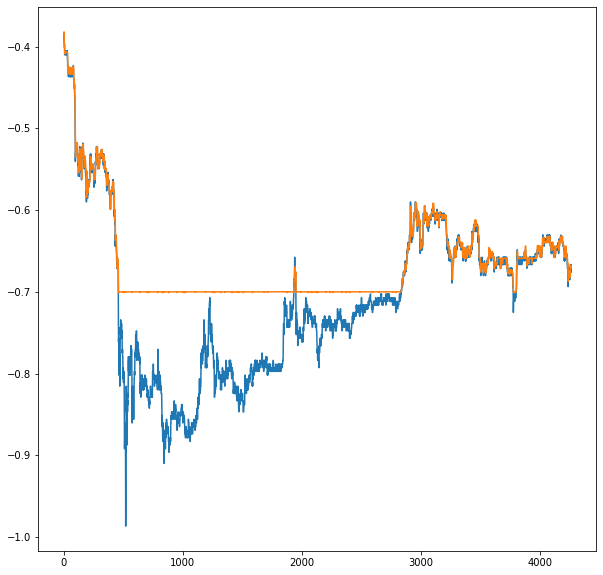

In [164]:
# plot
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(testY)
plt.plot(predict_test)
plt.show()

In [165]:
import xgboost
model = xgboost.XGBRegressor(learning_rate=0.1,
                             max_depth=5,
                             n_estimators=100) 
model.fit(trainX,trainY)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [166]:
file_name = 'xgb.pkl' 
joblib.dump(model, file_name) 

['xgb.pkl']

In [167]:
predict_test = model.predict(testX)

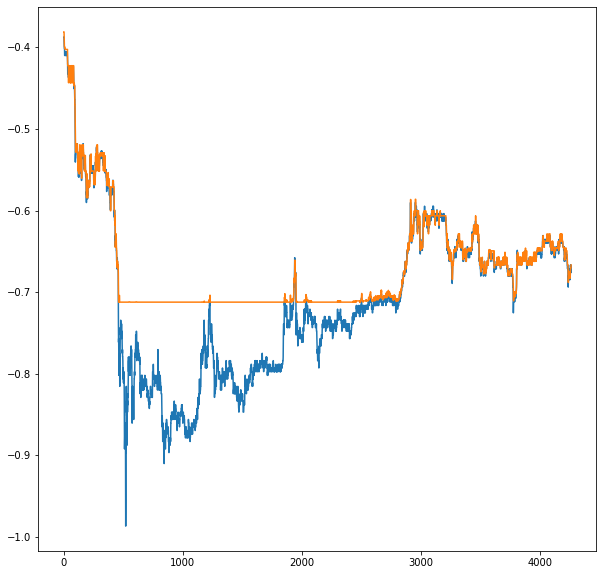

In [168]:
# plot
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(testY)
#plt.plot(testY)
plt.plot(predict_test)
plt.show()

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

# feature_importances_ 속성을 이용해 알고리즘이 선택한 피처의 중요도를 알 수 있다.
ftr_importances_values=model.feature_importances_ 
ftr_importances=pd.Series(ftr_importances_values,index=X_train.columns)
ftr_top20=ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top20')
sns.barplot(x=ftr_top20,y=ftr_top20.index)
plt.show()


NameError: name 'X_train' is not defined